Given an integer array nums where every element appears three times except for one,
which appears exactly once. Find the single element and return it.

Input: nums = `[2,2,3,2]`

Output: 3

Input: nums = `[0,1,0,1,0,1,99]`

Output: 99

Contraints 

$1 \leq \text{nums.length} \leq 3 * 10^4$

$ -2^{31} \leq \text{nums}[i] \leq 2^{31} - 1$

!!! You must implement a solution with a linear runtime complexity and use only constant extra space. !!!

------

# First Attempt

In [1]:
def singleNumber1(nums):
        bitList = [0 for _ in range(33)]
    

        for n in nums:
            bit_arr = list(format(abs(n), '032b'))
            if n < 0:
                bit_arr.append('1')
            else:
                bit_arr.append('0')

            bitList = [a+int(b) for a,b in zip(bitList, bit_arr)]
        
        bitList = [str(n % 3) for n in bitList]

        res = int(''.join(bitList[:-1]),2)
        
        return -res if int(bitList[-1]) else res

## Bit Counting Approach (Modulo 3)

We count the number of set bits at each bit position across all numbers.

    nums = [2, 2, 2, 3, 4, 4, 4]

Binary representations:

$$
\begin{aligned}
2 &\to 010 \\
2 &\to 010 \\
2 &\to 010 \\
3 &\to 011 \\
4 &\to 100 \\
4 &\to 100 \\
4 &\to 100
\end{aligned}
$$

## Bitwise Sum

$$
\begin{aligned}
\text{bit } 0&: 3 \\
\text{bit } 1&: 4 \\
\text{bit } 2&: 1 \\
\end{aligned}
$$

Taking modulo 3 at each bit position removes the contributions from numbers that appear exactly three times, leaving only the bits of the unique number.

## Caveats
•	Handling negative numbers requires extra care (e.g. fixed-width two’s complement or an additional sign bit).

•	The implementation becomes more complex due to frequent conversions between bits, binary strings, and integers.

## Key Idea

Numbers appearing three times cancel out under modulo 3; the remaining bits reconstruct the unique element.

-------

# Second Attempt

In [2]:
def singleNumber2(nums):
        ones = 0
        twos = 0
        for i in range(len(nums)):
            ones = (ones ^ nums[i]) & ~twos
            twos = (twos ^ nums[i]) & ~ones
        return ones

$$
\textbf{Bit-Level State Transition (ones / twos)}
$$

We focus on a single bit position and observe how it evolves as numbers are processed.

Initially, the state is:
$$
\text{ones} = 0, \quad \text{twos} = 0
$$

---

### Case 1: A sequence of \(0\)s arrives

Zeros do not affect the state:
$$
(0 \oplus 0) \,\&\, \sim 0 = 0 \quad (\text{ones})
$$
$$
(0 \oplus 0) \,\&\, \sim 0 = 0 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (0, 0)
$$

---

### Case 2: The first \(1\) arrives

$$
(0 \oplus 1) \,\&\, \sim 0 = 1 \quad (\text{ones})
$$
$$
(0 \oplus 1) \,\&\, \sim 1 = 0 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (1, 0)
$$

---

### Case 3: More \(0\)s arrive

$$
(1 \oplus 0) \,\&\, \sim 0 = 1 \quad (\text{ones})
$$
$$
(0 \oplus 0) \,\&\, \sim 1 = 0 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (1, 0)
$$

---

### Case 4: The second \(1\) arrives

$$
(1 \oplus 1) \,\&\, \sim 0 = 0 \quad (\text{ones})
$$
$$
(0 \oplus 1) \,\&\, \sim 0 = 1 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (0, 1)
$$

---

### Case 5: More \(0\)s arrive

$$
(0 \oplus 0) \,\&\, \sim 1 = 0 \quad (\text{ones})
$$
$$
(1 \oplus 0) \,\&\, \sim 0 = 1 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (0, 1)
$$

---

### Case 6: The third \(1\) arrives

$$
(0 \oplus 1) \,\&\, \sim 1 = 0 \quad (\text{ones})
$$
$$
(1 \oplus 1) \,\&\, \sim 0 = 0 \quad (\text{twos})
$$

$$
(\text{ones}, \text{twos}) = (0, 0)
$$

---

### Conclusion

At every third occurrence of a \(1\), the state resets to the initial configuration.
This ensures that bits belonging to numbers appearing exactly three times cancel out.

In [3]:
import time
import numpy as np
import pandas as pd
from plotnine import *

In [4]:
def compareFunctions(f1, f2, inputs):
    s_time = time.time()
    f1(*inputs)
    duration1 = time.time() - s_time

    s_time = time.time()
    f2(*inputs)
    duration2 = time.time() - s_time

    return (duration1, duration2)

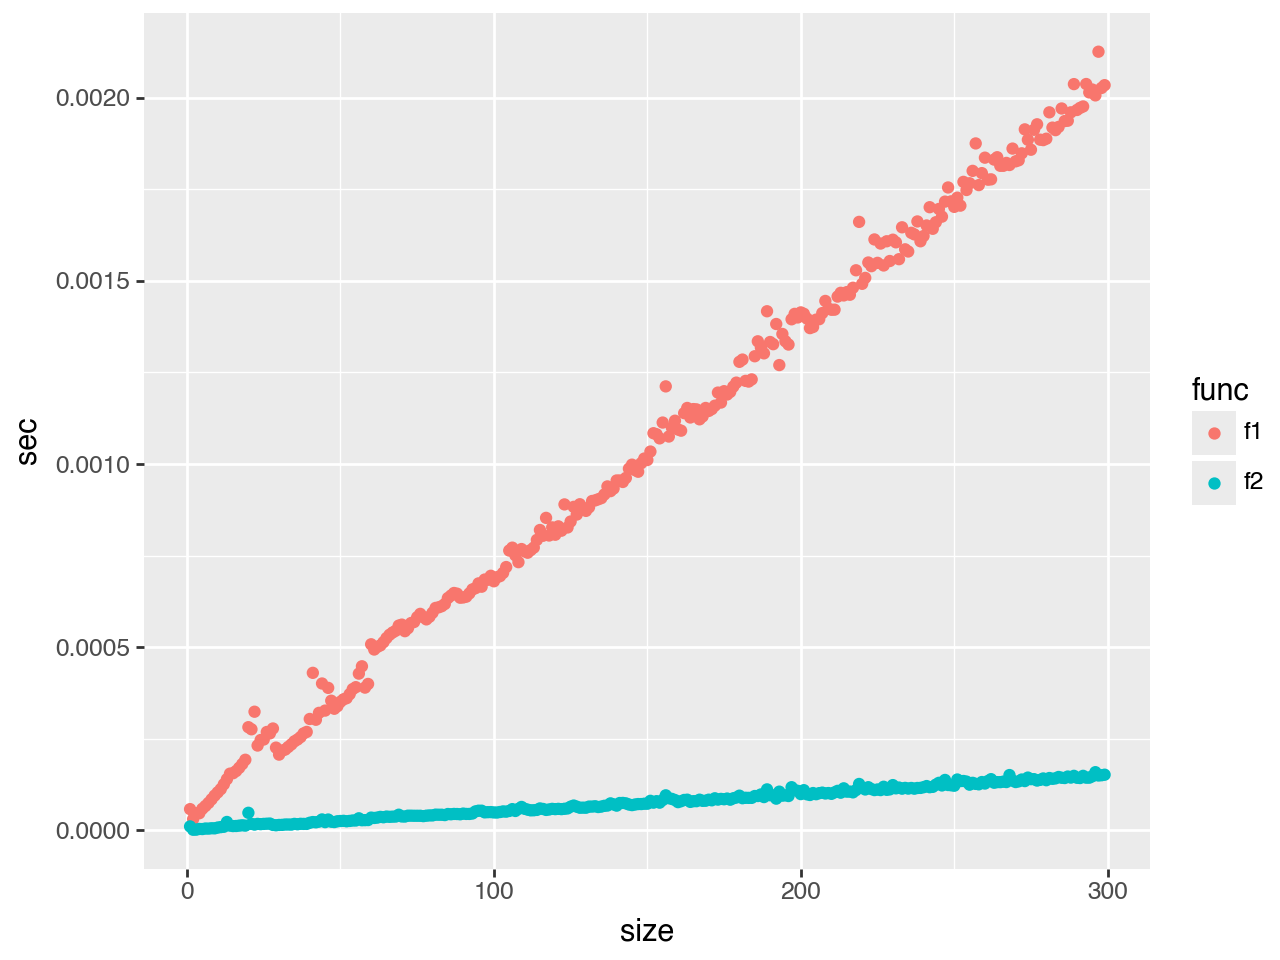

In [12]:

rows = []
for s in range(1,300):
    rand_int = np.concatenate((
        np.tile(np.random.randint(40000, size=s), 3),
        [np.random.randint(40001, 40001*2)]
    ))

    f1, f2 = compareFunctions(singleNumber1, singleNumber2, [rand_int])
    rows.append({'size':s,'f1':f1, 'f2':f2})

df = pd.DataFrame(rows)
df = df.melt(
    id_vars= 'size',
    value_vars= ['f1', 'f2'],
    var_name = 'func',
    value_name= 'sec'
)

(
    ggplot(df, aes('size', 'sec', color = 'func')) +
    geom_point()
)
